# Model Performance Analysis

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import pandas as pd
import sqlite3


# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("../Models/results.db")
data = pd.read_sql_query("SELECT * from results", con)
con.close()

# Verify that result of SQL query is stored in the dataframe
data.head()

,id,dataset,model_name,accuracy,precision,recall,f1Score,running_time,time_of_execution
0,1,Cornell Movie Review Dataset,Naive Bayes,0.766057,0.766131,0.765971,0.765991,0.001360,2023-08-17 16:11:53.577321
1,2,Cornell Movie Review Dataset,KNN,0.695734,0.695799,0.695753,0.695721,0.000548,2023-08-17 16:11:53.997904
2,3,Cornell Movie Review Dataset,Logistic Regression,0.762775,0.762774,0.762774,0.762774,0.056028,2023-08-17 16:11:54.188522
3,4,Cornell Movie Review Dataset,Decision Tree,0.641350,0.641251,0.641289,0.641259,0.894813,2023-08-17 16:11:55.214127
4,5,Cornell Movie Review Dataset,Random Forest,0.717768,0.718632,0.717178,0.717083,3.278693,2023-08-17 16:11:58.764299


In [51]:
data.columns

Index(['id', 'dataset', 'model_name', 'accuracy', 'precision', 'recall',
       'f1Score', 'running_time', 'time_of_execution'],
      dtype='object')

In [52]:
def visualizeDatasetResult(dataset_name):
    # Select the dataset you want to analyze
    data_subset = data[data['dataset'] == dataset_name]

    # Set the width and height of the figure
    plt.figure(figsize=(10,6))

    # Set the color palette
    sns.set_palette('muted')

    # Create a bar chart to compare the accuracy of different models
    sns.barplot(x=data_subset['accuracy'], y=data_subset['model_name'])

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy of Different Models on {dataset_name}')

    # Add a grid in the background
    plt.grid(True, which='both', axis='both', linestyle='--', color='gray')

    # Show the plot
    plt.show()


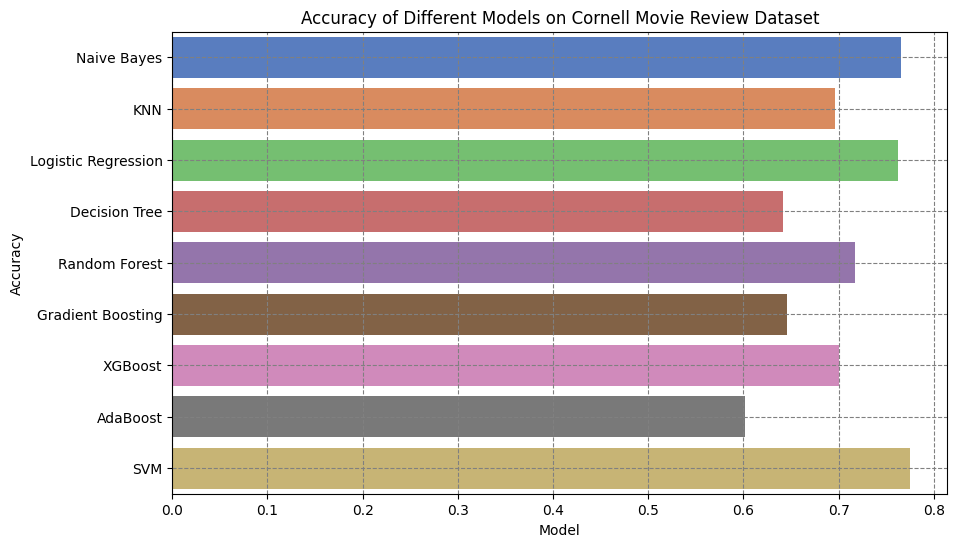

In [53]:
visualizeDatasetResult('Cornell Movie Review Dataset')

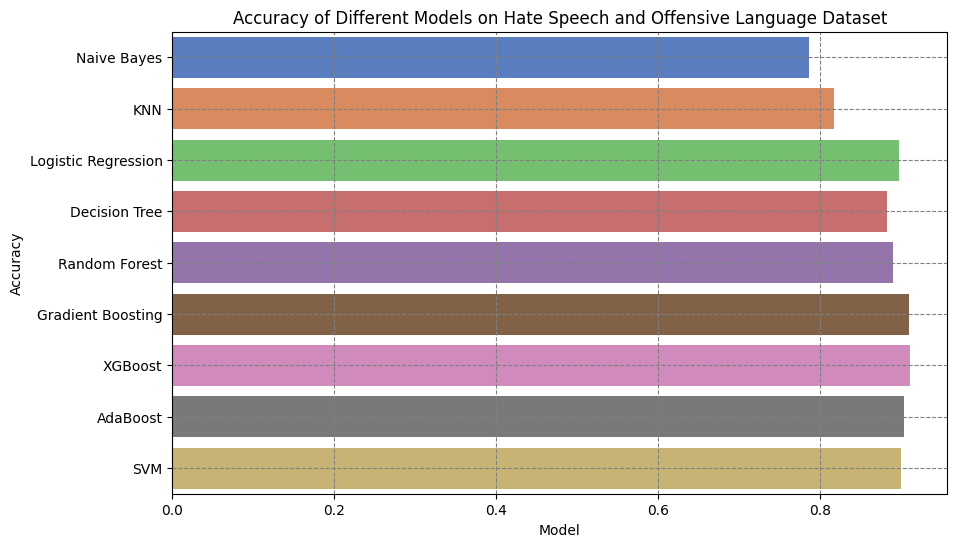

In [54]:
visualizeDatasetResult("Hate Speech and Offensive Language Dataset")

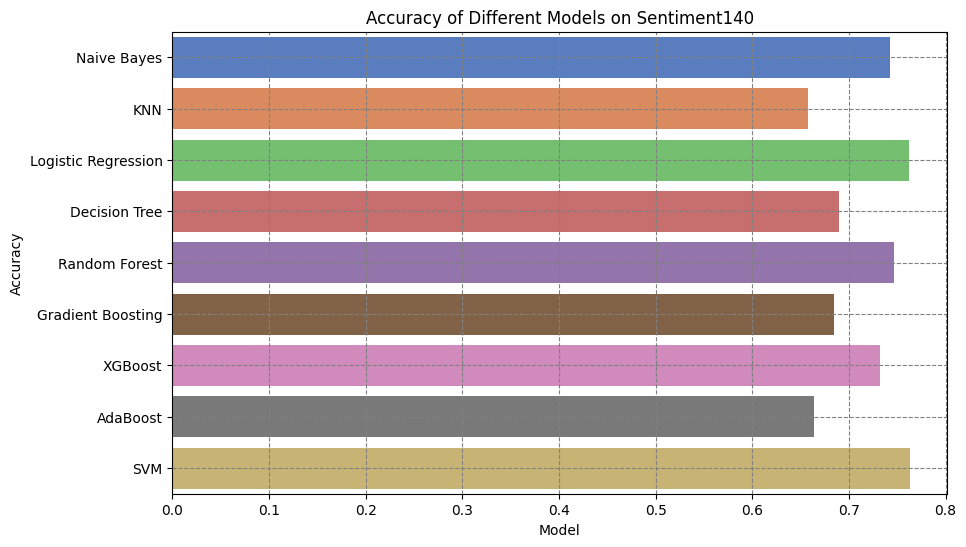

In [55]:
visualizeDatasetResult("Sentiment140")

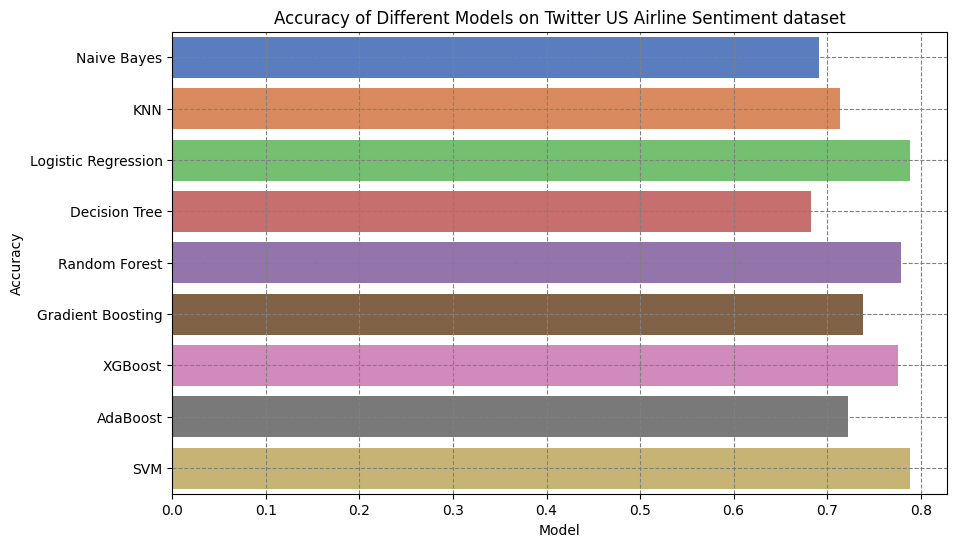

In [56]:
visualizeDatasetResult("Twitter US Airline Sentiment dataset")

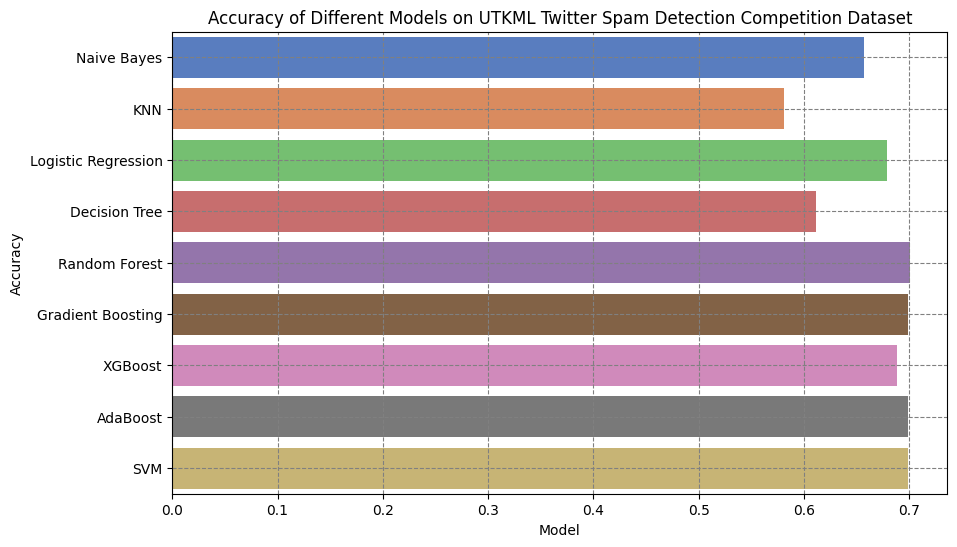

In [57]:
visualizeDatasetResult("UTKML Twitter Spam Detection Competition Dataset")

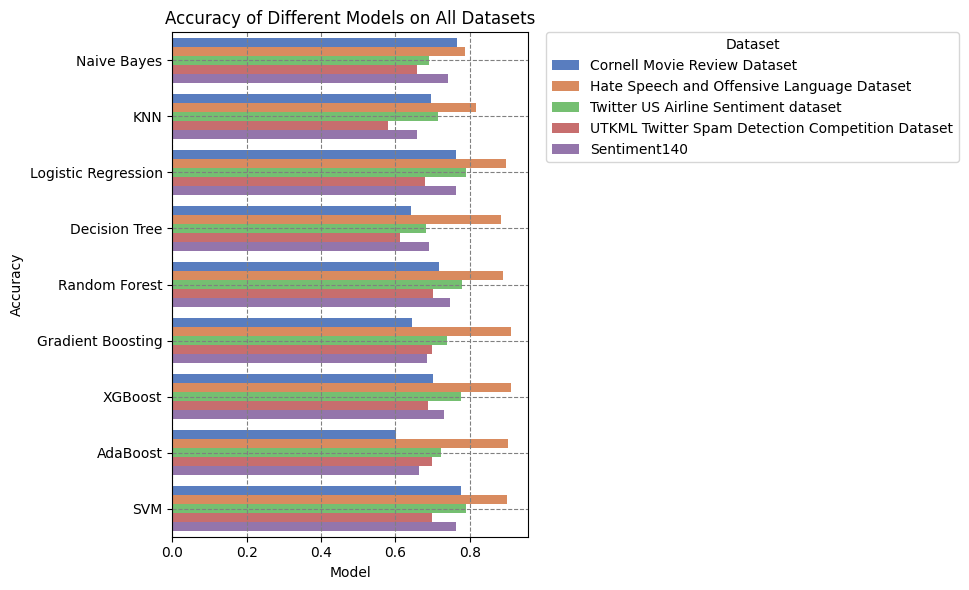

In [58]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Set the color palette
sns.set_palette('muted')

# Create a bar chart to compare the accuracy of different models on all datasets
sns.barplot(x='accuracy', y='model_name', hue='dataset', data=data)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on All Datasets')

# Add a legend outside the plot
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Add a grid in the background
plt.grid(True, which='both', axis='both', linestyle='--', color='gray')

# Show the plot
plt.tight_layout()
plt.show()

In [74]:
def generate_heatmap(data, metric):
    # Create a pivot table with the data
    data_pivot = data.pivot_table(index='dataset', columns='model_name', values=metric)

    # Set the width and height of the figure
    plt.figure(figsize=(10,6))

    # Set the color palette
    sns.set_palette('muted')

    # Create a heatmap to visualize the performance of all models on all datasets
    sns.heatmap(data_pivot, cmap='Blues', annot=True, fmt='.2f')

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Dataset')
    plt.title(f'{metric} of Different Models on All Datasets')

    # Show the plot
    plt.show()

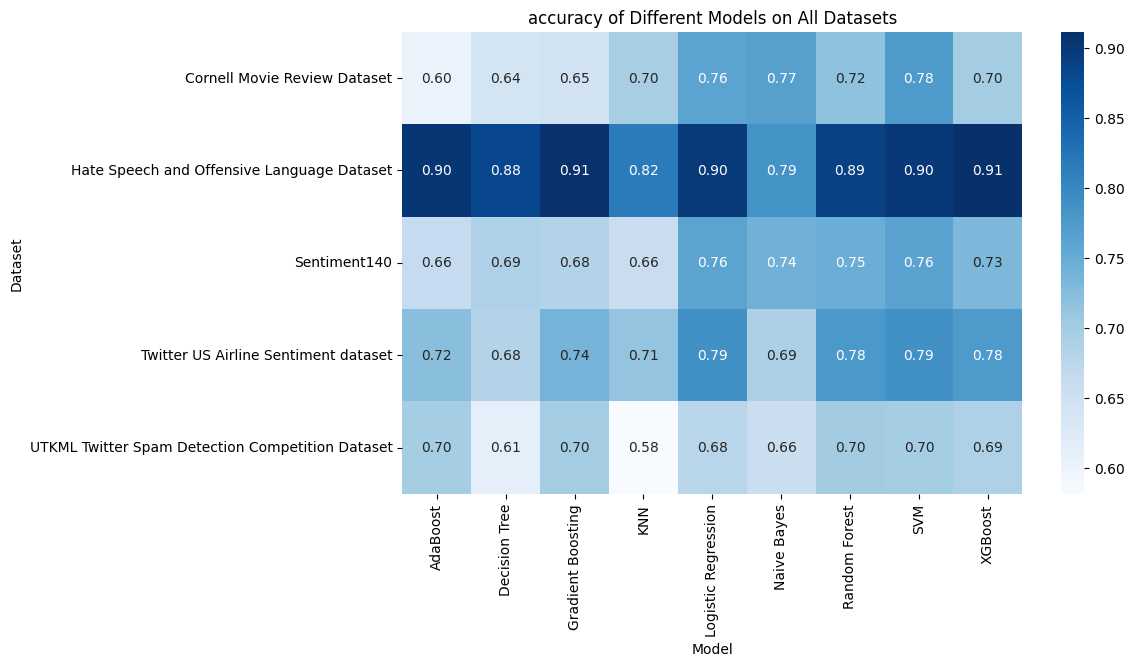

In [75]:
generate_heatmap(data, 'accuracy')

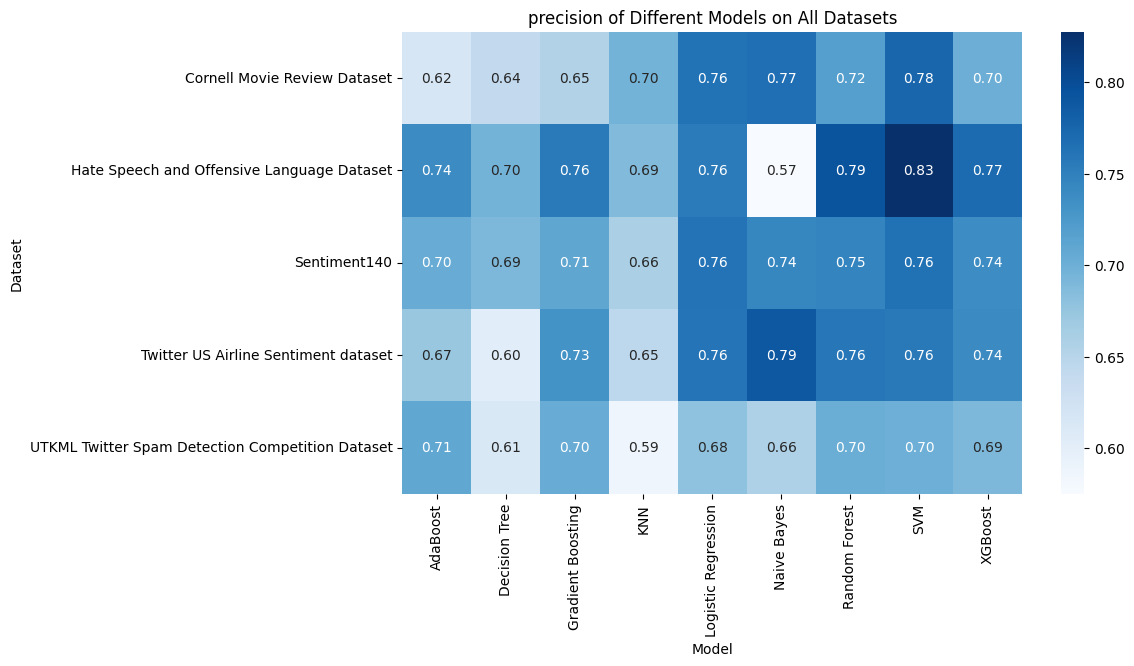

In [76]:
generate_heatmap(data, 'precision')

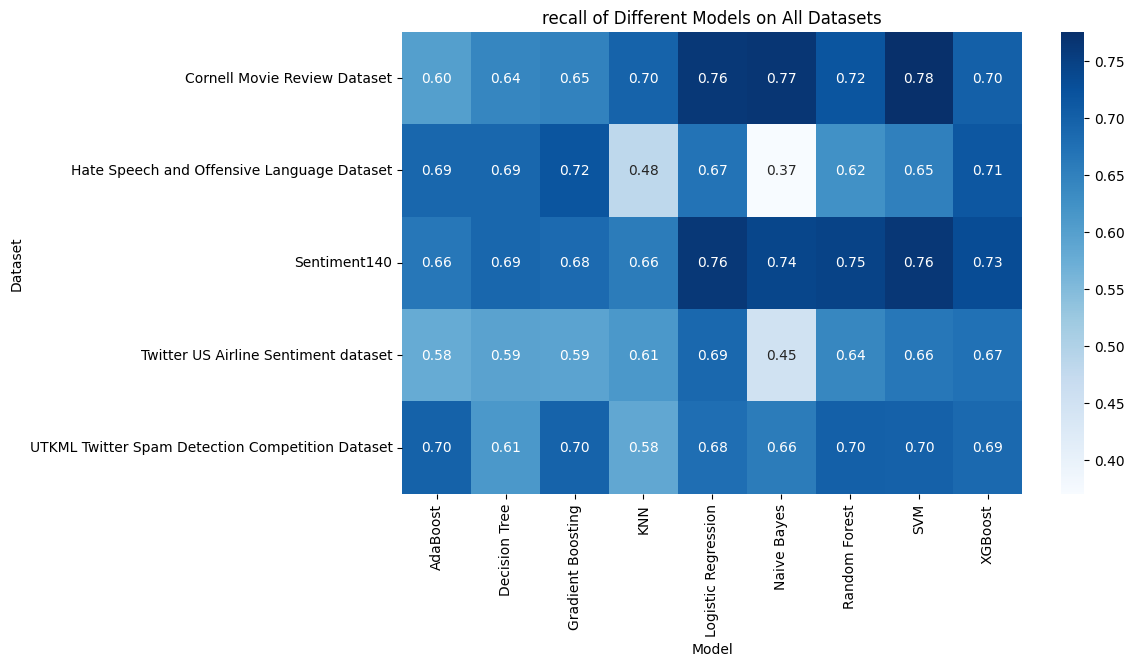

In [77]:
generate_heatmap(data, 'recall')

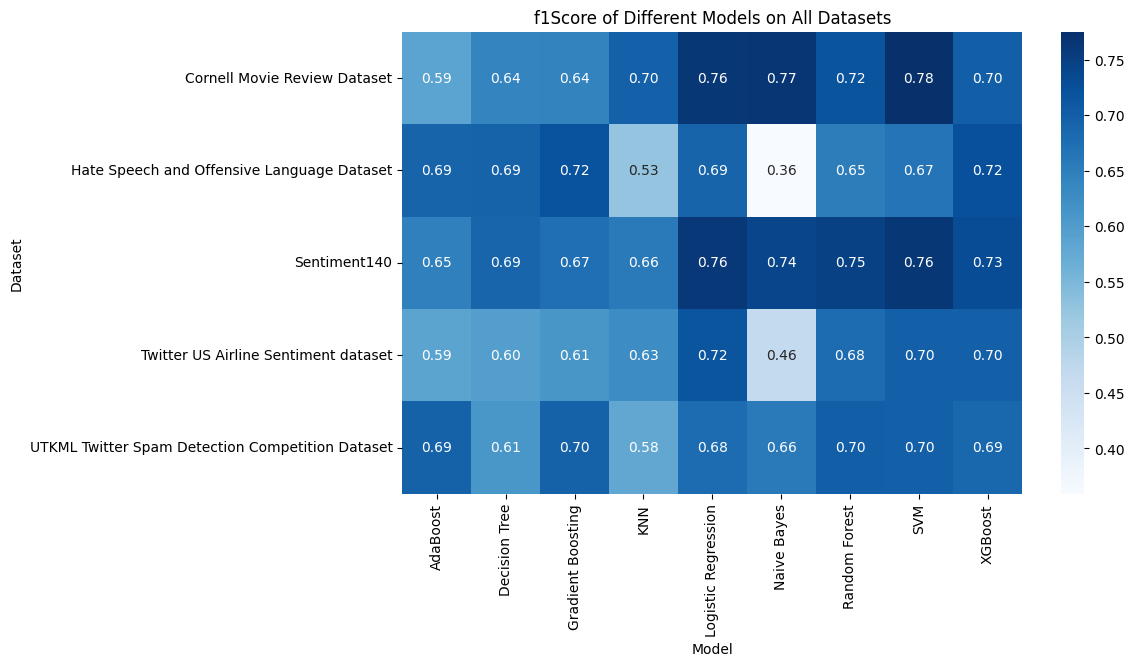

In [78]:
generate_heatmap(data, 'f1Score')

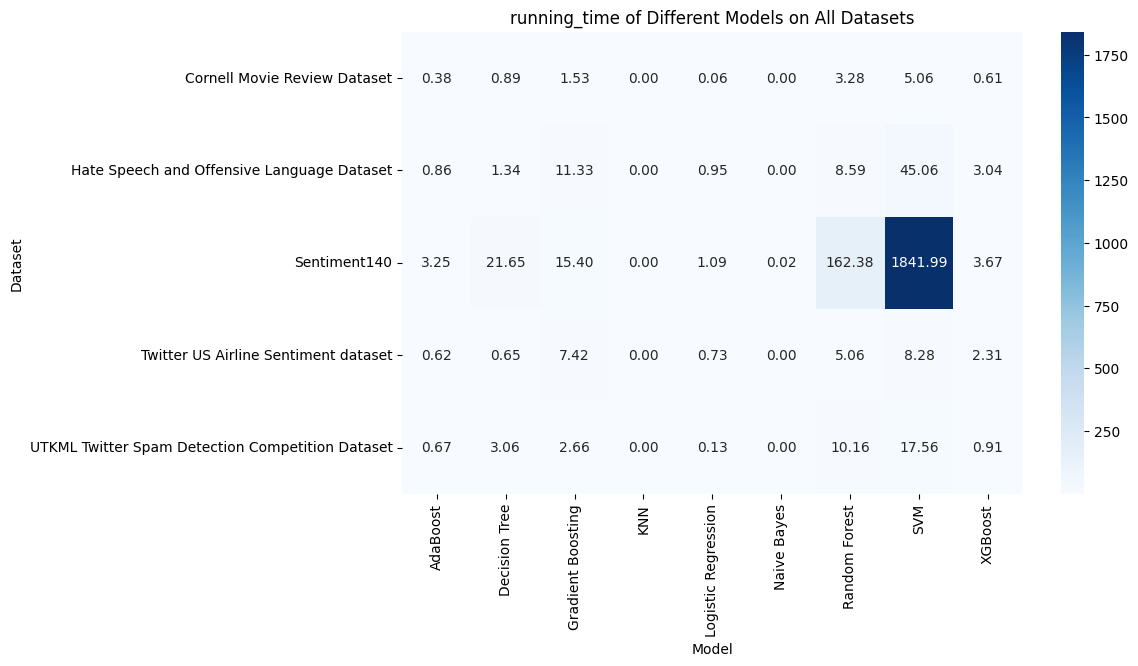

In [79]:
generate_heatmap(data, 'running_time')

In [80]:
def generate_scatterplot(data, x_metric, y_metric):
    # Set the width and height of the figure
    plt.figure(figsize=(10,6))

    # Set the color palette
    sns.set_palette('muted')

    # Create a scatter plot to visualize the trade-off between two performance metrics
    sns.scatterplot(x=x_metric, y=y_metric, hue='dataset', data=data)

    # Add labels and title
    plt.xlabel(x_metric)
    plt.ylabel(y_metric)
    plt.title(f'Trade-off between {x_metric} and {y_metric}')

    # Add a legend
    plt.legend(title='Dataset')

    # Show the plot
    plt.show()

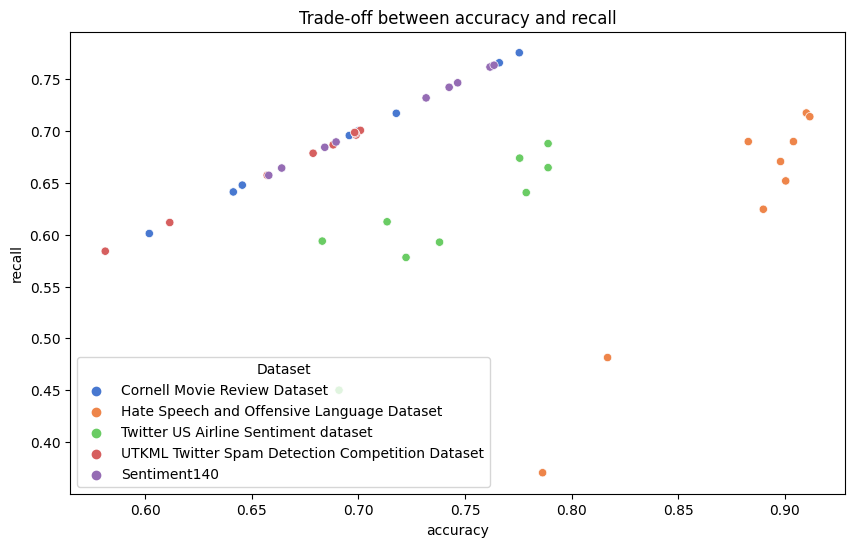

In [81]:
generate_scatterplot(data, 'accuracy', 'recall')

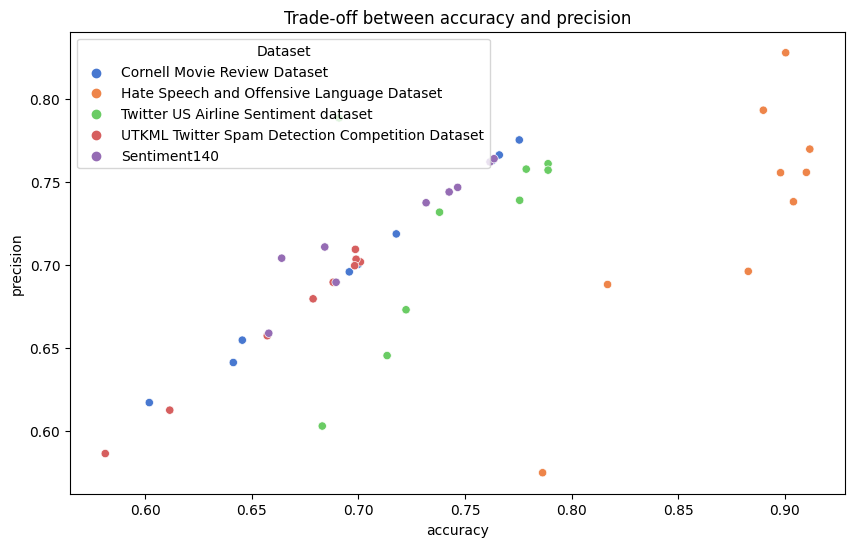

In [82]:
generate_scatterplot(data, 'accuracy', 'precision')

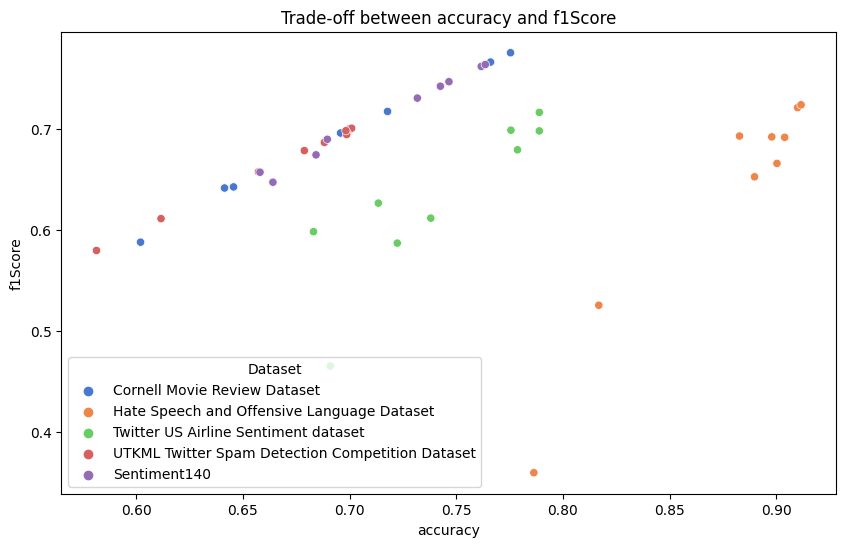

In [83]:
generate_scatterplot(data, 'accuracy', 'f1Score')

In [85]:
from scipy.stats import friedmanchisquare

# Rank the models for each dataset by accuracy
data['rank'] = data.groupby('dataset')['accuracy'].rank(ascending=False, method='min')

# Perform the Friedman test to compare the performance of the models across all datasets
stat, p = friedmanchisquare(*[data[data['model_name'] == model]['accuracy'] for model in data['model_name'].unique()])

# Print the results of the Friedman test
print(f'Friedman test statistic: {stat:.2f}, p-value: {p:.4f}')

data

Friedman test statistic: 19.70, p-value: 0.0115


,id,dataset,model_name,accuracy,precision,recall,f1Score,running_time,time_of_execution,rank
0,1,Cornell Movie Review Dataset,Naive Bayes,0.766057,0.766131,0.765971,0.765991,0.001360,2023-08-17 16:11:53.577321,2.0
1,2,Cornell Movie Review Dataset,KNN,0.695734,0.695799,0.695753,0.695721,0.000548,2023-08-17 16:11:53.997904,6.0
2,3,Cornell Movie Review Dataset,Logistic Regression,0.762775,0.762774,0.762774,0.762774,0.056028,2023-08-17 16:11:54.188522,3.0
3,4,Cornell Movie Review Dataset,Decision Tree,0.641350,0.641251,0.641289,0.641259,0.894813,2023-08-17 16:11:55.214127,8.0
4,5,Cornell Movie Review Dataset,Random Forest,0.717768,0.718632,0.717178,0.717083,3.278693,2023-08-17 16:11:58.764299,4.0
5,6,Cornell Movie Review Dataset,Gradient Boosting,0.645570,0.654717,0.647866,0.642330,1.528378,2023-08-17 16:12:00.421654,7.0
6,7,Cornell Movie Review Dataset,XGBoost,0.699953,0.700372,0.700293,0.699948,0.605174,2023-08-17 16:12:01.156069,5.0
7,8,Cornell Movie Review Dataset,AdaBoost,0.601969,0.617137,0.601192,0.587611,0.380132,2023-08-17 16:12:01.679779,9.0
8,9,Cornell Movie Review Dataset,SVM,0.775434,0.775175,0.775641,0.775244,5.061546,2023-08-17 16:12:08.067186,1.0
9,10,Hate Speech and Offensive Language Dataset,Naive Bayes,0.786363,0.574938,0.370321,0.359275,0.002739,2023-08-17 16:12:08.804928,9.0


In [86]:
def plot_ranks(data):
    # Create a pivot table with the data
    data_pivot = data.pivot_table(index='dataset', columns='model_name', values='rank')

    # Set the width and height of the figure
    plt.figure(figsize=(10,6))

    # Set the color palette
    sns.set_palette('muted')

    # Create a heatmap to visualize the ranks of all models on all datasets
    sns.heatmap(data_pivot, cmap='Blues', annot=True, fmt='.0f')

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Dataset')
    plt.title('Ranks of Different Models on All Datasets')

    # Show the plot
    plt.show()

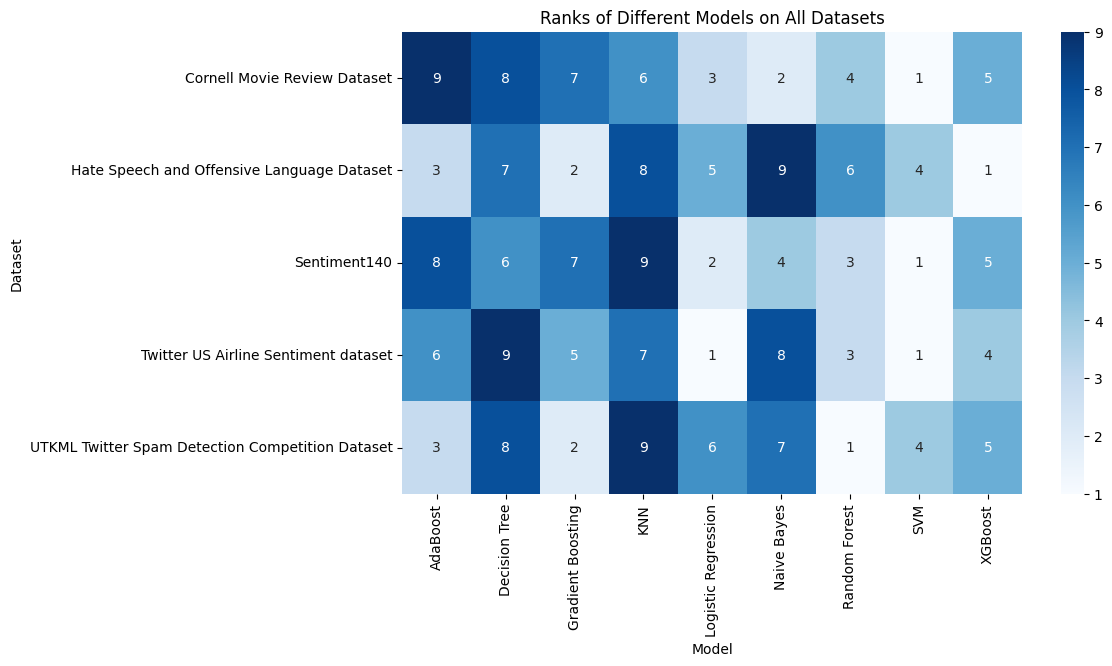

In [87]:
plot_ranks(data)

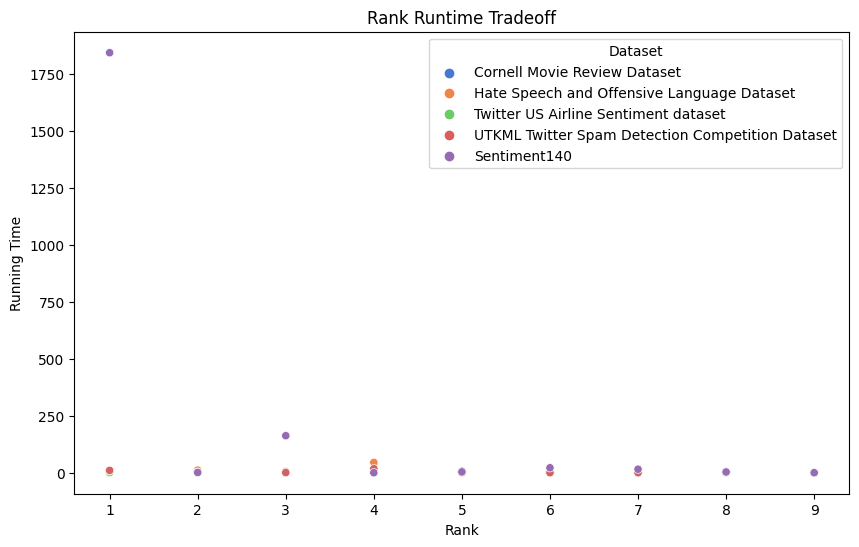

In [88]:
def plot_rank_runtime_tradeoff(data):
    # Set the width and height of the figure
    plt.figure(figsize=(10,6))

    # Set the color palette
    sns.set_palette('muted')

    # Create a scatter plot to visualize the rank runtime tradeoff
    sns.scatterplot(x='rank', y='running_time', hue='dataset', data=data)

    # Add labels and title
    plt.xlabel('Rank')
    plt.ylabel('Running Time')
    plt.title('Rank Runtime Tradeoff')

    # Add a legend
    plt.legend(title='Dataset')

    # Show the plot
    plt.show()

plot_rank_runtime_tradeoff(data)

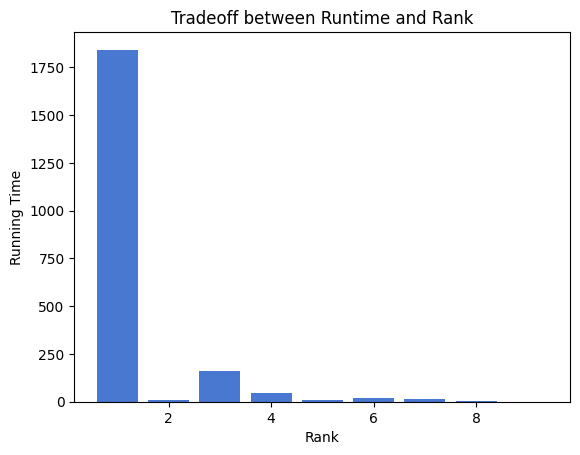

In [93]:
plt.bar(data['rank'], data['running_time'])
plt.xlabel('Rank')
plt.ylabel('Running Time')
plt.title('Tradeoff between Runtime and Rank')
plt.show()

In [95]:
average_ranks = data.groupby('model_name')['rank'].mean()
integer_ranks = average_ranks.rank(method='min').astype(int)
print(integer_ranks.sort_values())

model_name
SVM                    1
Logistic Regression    2
Random Forest          2
XGBoost                4
Gradient Boosting      5
AdaBoost               6
Naive Bayes            7
Decision Tree          8
KNN                    9
Name: rank, dtype: int64


In [101]:
def rankWithRuntime(weight):
    # assuming 'data' is a pandas DataFrame containing your dataset
    average_ranks = data.groupby('model_name')['rank'].mean()
    average_running_time = data.groupby('model_name')['running_time'].mean()

    # define the weights for average rank and running time
    rank_weight = 1 - weight
    running_time_weight = weight

    # calculate the weighted score for each model
    weighted_score = rank_weight * average_ranks + running_time_weight * (1 / average_running_time)

    # assign integer ranks to the models based on their weighted score
    integer_ranks = weighted_score.rank(method='min').astype(int)
    print(integer_ranks.sort_values())

In [102]:
rankWithRuntime(0.2)

model_name
SVM                    1
Random Forest          2
Logistic Regression    3
XGBoost                4
Gradient Boosting      5
AdaBoost               6
Decision Tree          7
Naive Bayes            8
KNN                    9
dtype: int64


In [103]:
rankWithRuntime(0.5)

model_name
SVM                    1
Random Forest          2
XGBoost                3
Gradient Boosting      4
Logistic Regression    5
AdaBoost               6
Decision Tree          7
Naive Bayes            8
KNN                    9
dtype: int64


In [104]:
rankWithRuntime(0.8)

model_name
SVM                    1
Random Forest          2
Gradient Boosting      3
XGBoost                4
Decision Tree          5
AdaBoost               6
Logistic Regression    7
Naive Bayes            8
KNN                    9
dtype: int64
